# DSI Project 2: Modeling of the Ames, Iowa Housing Dataset


## Problem Statement
----

As a part of real estate company, we are attempting to create a regression model based on the Ames Housing Dataset which could provide an accurate prediction on the sale price of a house.


## Overview
------

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses ([data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)). Our objective is to create a regression model that can help us to predict the saleprice of the house. We are going to conduct conduct exploratory data analysis (EDA) and feature engineering in order to select suitable features to be use as a predictor in our model. Among models that we are going to build, best model will be the model that provides us lowest mean squared error(MSE) and root mean squared error(RMSE)


## Part 1_Content:

- [Import Libraries & Dataset](#Import-Libraries-&-Dataset)
- [Data Cleaning on Train Dataset](#Data-Cleaning-on-Train-Dataset)
- [Feature Engineering & EDA](#Feature-Engineering-&-EDA)
- [Data Cleaning on Test Dataset](#Data-Cleaning-on-Test-Dataset)

## Import Libraries & Dataset
----

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## Data Cleaning on Train Dataset
----

### Correcting datatype

In [3]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

In [5]:
# In order to see the whole list of the datatypes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
train.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

`MS SubClass` and `Mo Sold` are categorical data even though it contain discrete data 

In [7]:
# Change dtypes for categorical data

train['MS SubClass'] = train['MS SubClass'].astype(object)
train['Mo Sold'] = train['Mo Sold'].astype(object)

In [8]:
print(train['MS SubClass'].dtypes)
print(train['Mo Sold'].dtypes)

object
object


In [9]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Target in the project is to predict the SalePrice of the house, `Id` & `PID` are just the indicated for the house and it does not have correlation with the target.

In [10]:
# Id and PID will not affect the Sale price and will not be use in the model.
train.drop(columns=['PID','Id'],inplace=True)
train.shape

(2051, 79)

### Checking on null value

In [11]:
# Checking on the null value
train.isnull().sum().sort_values().tail(30)

Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Garage Area          1
Garage Cars          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Total Bsmt SF        1
Bsmt Unf SF          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        22
Mas Vnr Type        22
Bsmt Cond           55
BsmtFin Type 1      55
Bsmt Qual           55
BsmtFin Type 2      56
Bsmt Exposure       58
Garage Type        113
Garage Finish      114
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Lot Frontage       330
Fireplace Qu      1000
Fence             1651
Alley             1911
Misc Feature      1986
Pool QC           2042
dtype: int64

In [12]:
# As we have total 2051 rows and majority of the Pool QC are NaN, we can drop the Pool QC 
train.drop(columns=['Pool QC'],inplace=True)

# After drop, should left 78 columns
train.shape

(2051, 78)

NaN in some data: 
- Misc Feature NaN : No miscellaneous feature not covered in other categories
- Alley NaN : No alley access
- Fence NaN : No fence
- Fireplace Qu NaN : No fireplace
- Lot frontage NaN : No street connected to the property
- Mas Vnr Type NaN : No masonry veneer
- Mas Vnr Area NaN : No masonry veneer

In [13]:
# Instead of dropping, fillna with 'None' as it means none
null_columns = ['Misc Feature', 'Alley','Fence','Fireplace Qu']
[train[i].fillna('None',inplace=True) for i in null_columns];

In [14]:
# lot frontage NaN to 0 
train['Lot Frontage'].fillna(0,inplace=True)

In [15]:
# Mas Vnr Type NaN to none.
# Mas Vnr Area NaN to 0
train['Mas Vnr Type'].fillna('None', inplace=True)
train['Mas Vnr Area'].fillna(0,inplace=True)

In [16]:
# Check if garage area and garage cars NaN equal to no garage
train[train['Garage Area'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [17]:
train[train['Garage Cars'].isnull()]['Garage Type']

1712    Detchd
Name: Garage Type, dtype: object

In [18]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

Null value in `Garage Area` and `Garage Cars` are missing completely at random (MCAR). Instead of fillna with 0, fill it with the mean value of the same `Garage Type`.

In [19]:
mean_detchd_area = train[train['Garage Type']=='Detchd']['Garage Area'].mean()
train['Garage Area'].fillna(mean_detchd_area, inplace=True)

mean_detchd_cars = train[train['Garage Type']=='Detchd']['Garage Cars'].mean()
train['Garage Cars'].fillna(mean_detchd_cars, inplace=True)

In [20]:
# Checking if garage yr blt is null means no garage
train[train['Garage Yr Blt'].isnull()]['Garage Type'].head()

28     NaN
53     NaN
65     NaN
79     NaN
101    NaN
Name: Garage Type, dtype: object

Assuming that all missing data in `Garage Yr Blt` is equals to no garage, make the `Garage Yr Blt` same as the `Year Built` of the house.

In [21]:
train['Garage Yr Blt'].fillna(train['Year Built'],inplace=True)

For the missing data in remaining garage data, fillna with None as it is equals to no garage.

In [22]:
# fillna for Garage Type, Garage Yr Blt,Garage Qual,Garage Cond,Garage Finish as they mean no garage

null_garage_columns = ['Garage Qual', 'Garage Cond','Garage Finish','Garage Type']
[train[i].fillna('None',inplace=True) for i in null_garage_columns];

Checking if NaN in the basement data are equal to no basement for all the missing basement info.

In [23]:
train[train['Bsmt Half Bath'].isnull()]['Bsmt Cond']

616     NaN
1327    NaN
Name: Bsmt Cond, dtype: object

In [24]:
train[train['Bsmt Full Bath'].isnull()]['Bsmt Cond']

616     NaN
1327    NaN
Name: Bsmt Cond, dtype: object

In [25]:
train[train['Bsmt Unf SF'].isnull()]['Bsmt Cond']

1327    NaN
Name: Bsmt Cond, dtype: object

In [26]:
train[train['BsmtFin SF 2'].isnull()]['Bsmt Cond']

1327    NaN
Name: Bsmt Cond, dtype: object

In [27]:
train[train['Total Bsmt SF'].isnull()]['Bsmt Cond']

1327    NaN
Name: Bsmt Cond, dtype: object

In [28]:
train[train['BsmtFin SF 1'].isnull()]['Bsmt Cond']

1327    NaN
Name: Bsmt Cond, dtype: object

Null value in basement data is equals to no basement.

In [29]:
# fillna with 0/None
null_bsmt_sf = ['BsmtFin SF 2','BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
[train[i].fillna(0,inplace=True) for i in null_bsmt_sf];

null_bsmt = ['Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1','BsmtFin Type 2', 'Bsmt Exposure']
[train[i].fillna('None',inplace=True) for i in null_bsmt];

In [30]:
# Check for null value again
train.isnull().sum().max()

0

## Feature Engineering  & EDA
-----

### Feature Engineering

Manipulation on the features in order to make the feature useful in the model.

### EDA

In order to have a better model, feature selection is important as we should only conside the feature that can be a suitable preditors in our model.

Criteria for a feature:
1. Distribution of the data should be evenly spread but not having only one majority value. Threshold used is 90% which means drop the feature that have >90% of the data falls in on one value. 

2. Correlation between features and our target (SalePrice) should be at least +/- 0.2. If the correlation between the feature and the target is low, this indicates that the feature will not significantly bring any effect on our target.


### Feature Engineering

Instead of including all the years that might be hard for the model to handle, features that indicate the years can be modified to be the age of the house or age of the garage.

1. `Year Remod/Add` indicates the year of remodel done if there is any. If `Year Remod/Add` is not equals to `Year Built`, it was remodel done. Binarize this remodel to be 1 if there is remodel done, 0 if there is not.

In [31]:
# if the Year remod/add is not equal year built, consider as there is remodel done so equal to 1
train['remodel'] = abs(train['Year Remod/Add'] - train['Year Built'])

In [32]:
train['remodel'].head()

0    29
1     1
2    54
3     1
4    93
Name: remodel, dtype: int64

In [33]:
# Binarize Year Remod/Add column
train['remodel'] = [1 if i != 0  else 0 for i in train['remodel']]

In [34]:
train['remodel'].value_counts()

0    1101
1     950
Name: remodel, dtype: int64

2. Combine `Year Built` and `Yr Sold` to be `age` of the house to indicates the age of the house when it was sold.

In [35]:
# Convert the Year to be the age of the property
train['age'] = train['Yr Sold'] - train['Year Built']

In [36]:
train['age'].describe()

count    2051.000000
mean       36.066797
std        30.211061
min        -1.000000
25%         7.000000
50%        34.000000
75%        54.000000
max       136.000000
Name: age, dtype: float64

`age` of a property shouldn't be less than 0. There might be some incorrect data in `Year Built`. Drop the row of the data that contains `age` less than 0.

In [37]:
train[train['age']<0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,remodel,age
1885,20,RL,128.0,39290,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,None,Elev,17000,10,2007,New,183850,1,-1


In [38]:
train.drop(train[train['age']<0].index,inplace=True)

In [39]:
train[train['age']<0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,remodel,age


3. Combine `Garage Yr Blt` and `Yr Sold` to be `Garage age` of to indicates the age of the garage when it was sold.

In [40]:
# Change Garage Yr Blt to Garage Age
train['Garage age'] = train['Yr Sold'] - train['Garage Yr Blt']

In [41]:
train['Garage age'].head()

0    34.0
1    12.0
2    57.0
3     3.0
4    53.0
Name: Garage age, dtype: float64

In [42]:
train['Garage age'].describe()

count    2050.000000
mean       31.083415
std        27.130352
min      -200.000000
25%         6.000000
50%        30.000000
75%        49.000000
max       136.000000
Name: Garage age, dtype: float64

`Garage age` shouldn't be less than 0. There might be some incorrect data in `Year Sold`. Drop the row of the data that contains `Garage age` less than 0.

In [43]:
train[train['Garage age']<0]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,remodel,age,Garage age
1699,20,RL,68.0,8298,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,None,None,0,9,2007,New,267300,1,1,-200.0


In [44]:
train.drop(train[train['Garage age']<0].index,inplace=True)

In [45]:
train['Garage age'].describe()

count    2049.000000
mean       31.196193
std        26.651992
min         0.000000
25%         6.000000
50%        30.000000
75%        49.000000
max       136.000000
Name: Garage age, dtype: float64

In [46]:
# After making the new features, drop the columns
train.drop(columns=['Year Remod/Add','Yr Sold', 'Year Built','Garage Yr Blt'],inplace=True)

In [47]:
train.shape

(2049, 77)

### EDA_Continuos/Discrete Features

Checking whether the continuos/discrete features fulfill the criteria on data distribution and correlation with target.

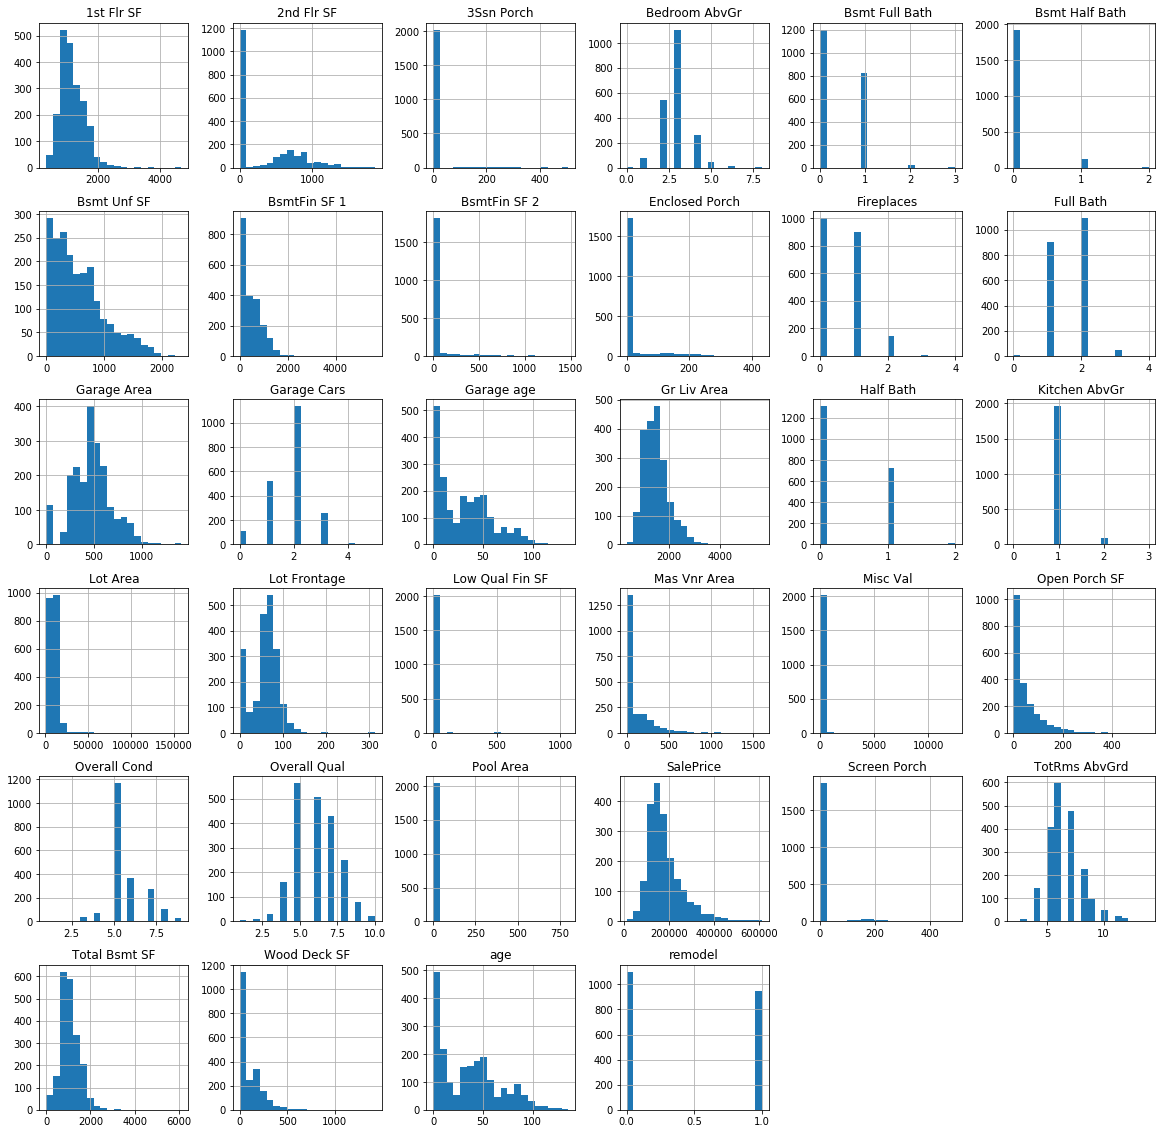

In [48]:
train.hist(figsize=(20,20),bins=20);

In [49]:
# Double check data distribution

x_vars = ['3Ssn Porch', 'Bsmt Half Bath', 'BsmtFin SF 2','Enclosed Porch', 'Kitchen AbvGr',
         'Low Qual Fin SF', 'Misc Val','Pool Area','Screen Porch']

for i in x_vars:
    print(f'{i} : \n{round(train[i].value_counts(normalize=True).max(),4)}')

3Ssn Porch : 
0.9873
Bsmt Half Bath : 
0.939
BsmtFin SF 2 : 
0.8795
Enclosed Porch : 
0.8404
Kitchen AbvGr : 
0.9556
Low Qual Fin SF : 
0.9839
Misc Val : 
0.9688
Pool Area : 
0.9956
Screen Porch : 
0.9117


In [50]:
# Checking the correlation with the target to double confirm before dropping
x_vars = ['3Ssn Porch', 'Bsmt Half Bath','Kitchen AbvGr','Low Qual Fin SF', 'Misc Val','Pool Area','Screen Porch','SalePrice']

train[x_vars].corr()['SalePrice'].sort_values()

Kitchen AbvGr     -0.125371
Bsmt Half Bath    -0.045380
Low Qual Fin SF   -0.041548
Misc Val          -0.010260
Pool Area          0.023147
3Ssn Porch         0.048802
Screen Porch       0.134782
SalePrice          1.000000
Name: SalePrice, dtype: float64

Based on the histogram and value_counts, features below have >90% of its distribution is on one majority value. These features also have correlation < +/-0.2 with the target. Thus, these features can be drop.

         3Ssn Porch, Bsmt Half Bath, Kitchen AbvGr, Low Qual Fin SF, Misc Val,Pool Area, Screen Porch

In [51]:
train.drop(columns=['3Ssn Porch', 'Bsmt Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF','Misc Val','Pool Area',
                    'Screen Porch'],inplace=True)
train.shape

(2049, 70)

Heatmap to visualise the correlation between discrete/continuos features. If two features are highly correlated (+/-0.8), we can select one of them which has higher correlation with our target.

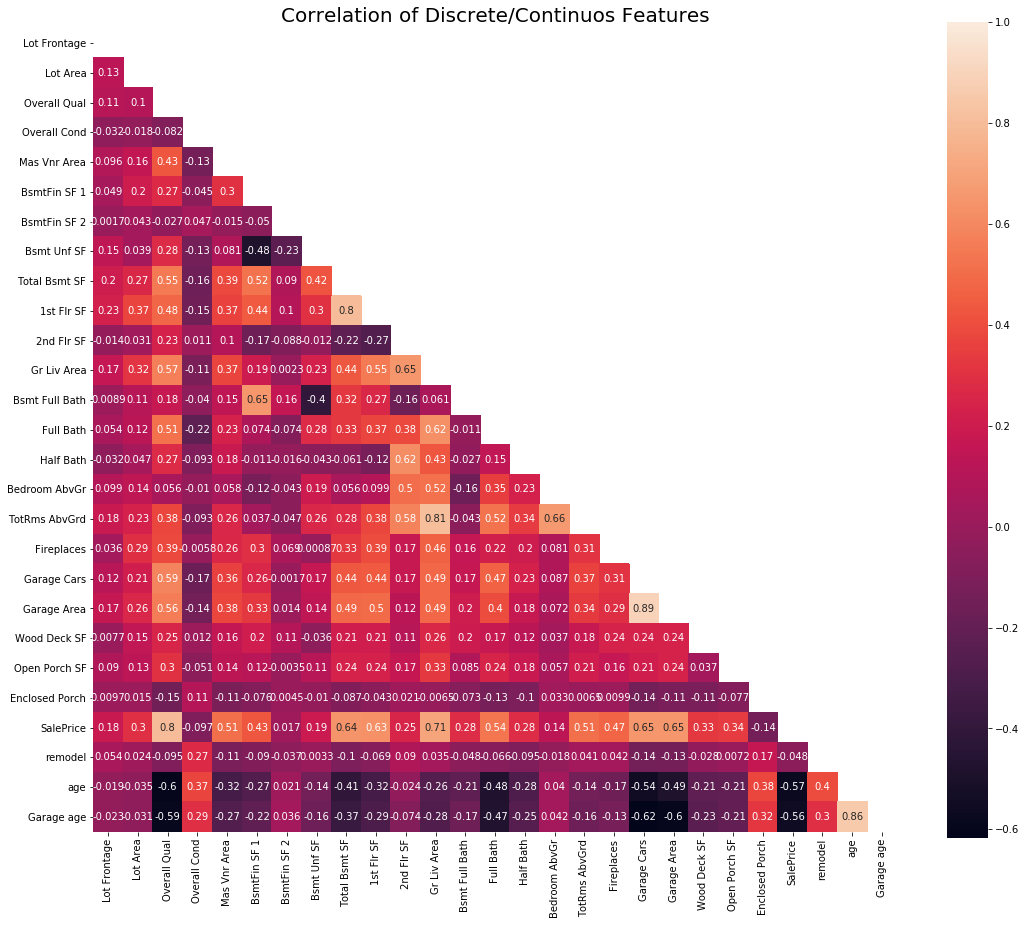

In [52]:
# Correlation of features

plt.figure(figsize=(18,15))

ax = plt.axes()
ax.set_title('Correlation of Discrete/Continuos Features', fontdict={'fontsize':20})

mask = np.triu(train.corr())
sns.heatmap(train.corr(),mask=mask,annot=True, square=True);

Based on the heatmap, below are the features that highly correlated with each other.

Features:
1. 1st Flr SF & Total Bsmt SF : 0.8
2. TotRms AbvGrd & Gr Liv Area : 0.81
3. Garage Area & Garage Cars : 0.89

`Overall Qual` has high correlation (0.8) with the target `SalePrice`, note that it will be a good feature to be include in the model as a predictors.

In [53]:
# Checking the correlation of correlated features with the target

var = ['1st Flr SF', 'Total Bsmt SF', 'TotRms AbvGrd','Gr Liv Area', 'Garage Area','Garage Cars','SalePrice']
train[var].corr()['SalePrice'].sort_values()

TotRms AbvGrd    0.507983
1st Flr SF       0.633528
Total Bsmt SF    0.641703
Garage Cars      0.648664
Garage Area      0.651938
Gr Liv Area      0.706016
SalePrice        1.000000
Name: SalePrice, dtype: float64

By checking the correlation of the features with SalePrice, select those features that have higher correlation with SalePrice:

Features selection:
1. 1st Flr SF & Total Bsmt SF : Total Bsmt SF (0.64)
2. TotRms AbvGrd & Gr Liv Area : Gr Liv Area (0.71)
3. Garage Area & Garage Cars : Garage Area (0.65)

In another words, features to be drop: 1st Flr SF, TotRms AbvGrd, Garage Cars

In [54]:
train.drop(columns= ['1st Flr SF', 'TotRms AbvGrd', 'Garage Cars'],
           inplace=True)
train.shape

(2049, 67)

In [55]:
# Checking the correlation of features with discrete/continuos data with the target

train.corr()['SalePrice'].sort_values()

age              -0.571812
Garage age       -0.555926
Enclosed Porch   -0.135500
Overall Cond     -0.096782
remodel          -0.047990
BsmtFin SF 2      0.016595
Bedroom AbvGr     0.137731
Lot Frontage      0.181518
Bsmt Unf SF       0.190528
2nd Flr SF        0.249016
Half Bath         0.283602
Bsmt Full Bath    0.283959
Lot Area          0.298099
Wood Deck SF      0.327371
Open Porch SF     0.337432
BsmtFin SF 1      0.430038
Fireplaces        0.471464
Mas Vnr Area      0.509170
Full Bath         0.537860
Total Bsmt SF     0.641703
Garage Area       0.651938
Gr Liv Area       0.706016
Overall Qual      0.801494
SalePrice         1.000000
Name: SalePrice, dtype: float64

Threshold of correlation between features with SalePrice is at least +/-0.2, feature that have less than +/-0.2 correlation with SalePrice:
            
            Enclosed Porch, Overall Cond, remodel, BsmtFin SF 2, Bedroom AbvGr, Lot Frontage, Bsmt Unf SF

In [56]:
train.drop(columns= ['Enclosed Porch', 'Overall Cond', 'remodel', 'BsmtFin SF 2', 'Bedroom AbvGr', 'Lot Frontage',
                     'Bsmt Unf SF'],inplace=True)
train.shape

(2049, 60)

### EDA_Nominal/Categorical Features

Checking whether the nominal/categorical features fulfill the criteria on data distribution and correlation with target.

In [57]:
# Categorical features

c_data = []

for c in train:
    if train[c].dtypes =='object':
        c_data.append(c)

print(len(c_data))        
c_data

43


['MS SubClass',
 'MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'Misc Feature',
 'Mo Sold',
 'Sale Type']

In [58]:
# Boxplot for categorical features
def subplot_boxplot(dataframe, y, list_of_x):
   # nrows = int(np.ceil(len(list_of_x)/2)) 
    fig, ax = plt.subplots(nrows=len(list_of_x), ncols=1, figsize= (20,250))
    
    ax = ax.ravel() 
    for i, column in enumerate(list_of_x): 
        sns.boxplot(ax=ax[i], data=dataframe, x=column,y=y)        

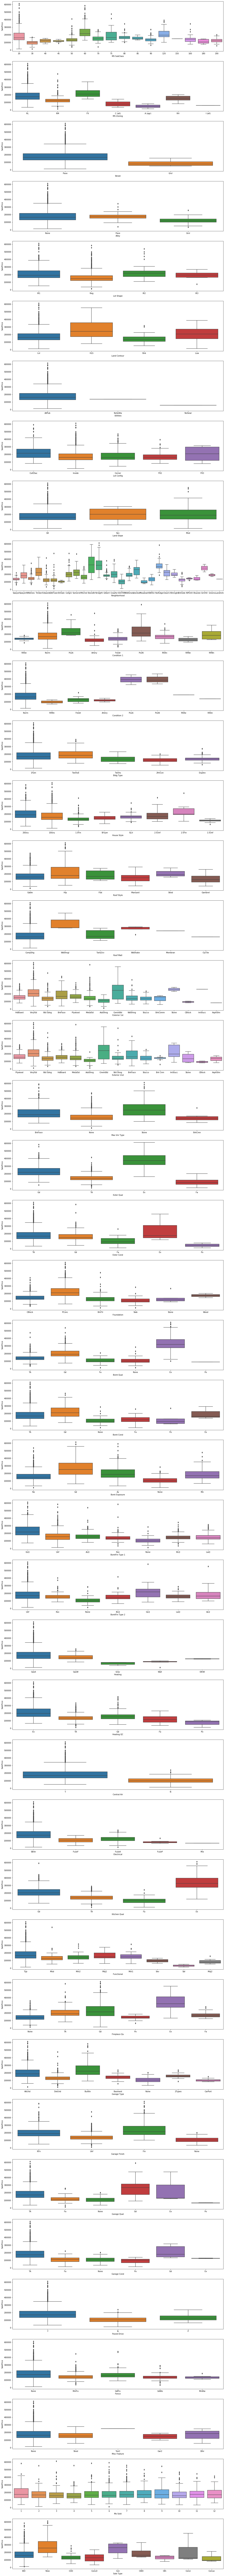

In [59]:
subplot_boxplot(train, train['SalePrice'], c_data)

Based on the boxplot, features that have >90% distribution on one majority value:

    Street, Alley, Utilities, Land Slope, Condition 2, Roof Matl, Heating, Central Air, Electrical,Functional,
    Garage Cond, Paved Drive, Misc Feature

In [60]:
# Double check the value count as it might have only one majority

for i in c_data:
    print(f'{i} : {round(train[i].value_counts(normalize=True).max(),4)}')

MS SubClass : 0.3748
MS Zoning : 0.7789
Street : 0.9966
Alley : 0.9317
Lot Shape : 0.632
Land Contour : 0.8995
Utilities : 0.999
Lot Config : 0.7326
Land Slope : 0.9522
Neighborhood : 0.1513
Condition 1 : 0.8614
Condition 2 : 0.9873
Bldg Type : 0.8287
House Style : 0.5159
Roof Style : 0.7901
Roof Matl : 0.9873
Exterior 1st : 0.3529
Exterior 2nd : 0.3514
Mas Vnr Type : 0.6047
Exter Qual : 0.6086
Exter Cond : 0.8668
Foundation : 0.451
Bsmt Qual : 0.4329
Bsmt Cond : 0.8941
Bsmt Exposure : 0.6535
BsmtFin Type 1 : 0.2992
BsmtFin Type 2 : 0.8526
Heating : 0.9839
Heating QC : 0.5188
Central Air : 0.9312
Electrical : 0.9107
Kitchen Qual : 0.511
Functional : 0.9336
Fireplace Qu : 0.488
Garage Type : 0.591
Garage Finish : 0.4143
Garage Qual : 0.8931
Garage Cond : 0.9107
Paved Drive : 0.9073
Fence : 0.8048
Misc Feature : 0.9688
Mo Sold : 0.1718
Sale Type : 0.8692


Features that does not fulfill the criteria: 
     
         Street, Alley, Utilities, Land Slope, Condition 2, Roof Matl, Heating, 
         Central Air,Electrical, Functional, Garage Cond, Paved Drive, Misc Feature

In [61]:
train.drop(columns= ['Street', 'Alley', 'Utilities','Land Slope','Condition 2','Roof Matl','Heating', 'Central Air', 
                     'Electrical', 'Functional', 'Garage Cond','Paved Drive','Misc Feature'], inplace = True)

In [62]:
train.shape

(2049, 47)

### Feature Engineering on Ordinal Features.

Mapping the data of ordinal features with a rating instead of using it as a categorical data. 1 indicates the lowest rate. 

In [63]:
train.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape', 'Land Contour',
       'Lot Config', 'Neighborhood', 'Condition 1', 'Bldg Type', 'House Style',
       'Overall Qual', 'Roof Style', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'Total Bsmt SF',
       'Heating QC', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'Kitchen Qual', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Finish', 'Garage Area', 'Garage Qual',
       'Wood Deck SF', 'Open Porch SF', 'Fence', 'Mo Sold', 'Sale Type',
       'SalePrice', 'age', 'Garage age'],
      dtype='object')

In [64]:
train['Lot Shape'].value_counts()

Reg    1295
IR1     690
IR2      55
IR3       9
Name: Lot Shape, dtype: int64

In [65]:
train['Lot Shape'] = train['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
train['Lot Shape'].value_counts()

4    1295
3     690
2      55
1       9
Name: Lot Shape, dtype: int64

In [66]:
train['Exter Qual'].value_counts()

TA    1247
Gd     696
Ex      80
Fa      26
Name: Exter Qual, dtype: int64

In [67]:
train['Exter Qual'] = train['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Exter Qual'].value_counts()

3    1247
4     696
5      80
2      26
Name: Exter Qual, dtype: int64

In [68]:
train['Exter Cond'].value_counts()

TA    1776
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [69]:
train['Exter Cond'] = train['Exter Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Exter Cond'].value_counts()

3    1776
4     215
2      49
5       7
1       2
Name: Exter Cond, dtype: int64

In [70]:
train['Bsmt Qual'].value_counts()

TA      887
Gd      863
Ex      183
Fa       60
None     55
Po        1
Name: Bsmt Qual, dtype: int64

In [71]:
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['Bsmt Qual'].value_counts()

3    887
4    863
5    183
2     60
0     55
1      1
Name: Bsmt Qual, dtype: int64

In [72]:
train['Bsmt Cond'].value_counts()

TA      1832
Gd        89
Fa        65
None      55
Po         5
Ex         3
Name: Bsmt Cond, dtype: int64

In [73]:
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['Bsmt Cond'].value_counts()

3    1832
4      89
2      65
0      55
1       5
5       3
Name: Bsmt Cond, dtype: int64

In [74]:
train['Bsmt Exposure'].value_counts()

No      1339
Av       287
Gd       202
Mn       163
None      58
Name: Bsmt Exposure, dtype: int64

In [75]:
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
train['Bsmt Exposure'].value_counts()

1    1339
3     287
4     202
2     163
0      58
Name: Bsmt Exposure, dtype: int64

In [76]:
train['BsmtFin Type 1'].value_counts()

GLQ     613
Unf     603
ALQ     293
BLQ     200
Rec     183
LwQ     102
None     55
Name: BsmtFin Type 1, dtype: int64

In [77]:
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
train['BsmtFin Type 1'].value_counts()

6    613
1    603
5    293
4    200
3    183
2    102
0     55
Name: BsmtFin Type 1, dtype: int64

In [78]:
train['BsmtFin Type 2'].value_counts()

Unf     1747
Rec       80
LwQ       60
None      56
BLQ       48
ALQ       35
GLQ       23
Name: BsmtFin Type 2, dtype: int64

In [79]:
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
train['BsmtFin Type 2'].value_counts()

1    1747
3      80
2      60
0      56
4      48
5      35
6      23
Name: BsmtFin Type 2, dtype: int64

In [80]:
train['Heating QC'].value_counts()

Ex    1063
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [81]:
train['Heating QC'] = train['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Heating QC'].value_counts()

5    1063
3     597
4     319
2      67
1       3
Name: Heating QC, dtype: int64

In [82]:
train['Fireplace Qu'].value_counts()

None    1000
Gd       521
TA       407
Fa        59
Ex        31
Po        31
Name: Fireplace Qu, dtype: int64

In [83]:
train['Fireplace Qu'] = train['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['Fireplace Qu'].value_counts()

0    1000
4     521
3     407
2      59
5      31
1      31
Name: Fireplace Qu, dtype: int64

In [84]:
train['Garage Qual'].value_counts()

TA      1830
None     114
Fa        82
Gd        18
Ex         3
Po         2
Name: Garage Qual, dtype: int64

In [85]:
train['Garage Qual'] = train['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
train['Garage Qual'].value_counts()

3    1830
0     114
2      82
4      18
5       3
1       2
Name: Garage Qual, dtype: int64

In [86]:
train['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     149
Fa      47
Name: Kitchen Qual, dtype: int64

In [87]:
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
train['Kitchen Qual'].value_counts()

3    1047
4     806
5     149
2      47
Name: Kitchen Qual, dtype: int64

In [88]:
train['Garage Finish'].value_counts()

Unf     849
RFn     578
Fin     508
None    114
Name: Garage Finish, dtype: int64

In [89]:
train['Garage Finish'] = train['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
train['Garage Finish'].value_counts()

1    849
2    578
3    508
0    114
Name: Garage Finish, dtype: int64

In [90]:
train['Fence'].value_counts()

None     1649
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [91]:
train['Fence'] = train['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0})
train['Fence'].value_counts()

0    1649
3     227
4      83
2      80
1      10
Name: Fence, dtype: int64

### EDA_Ordinal Features

Checking whether the ordinal features fulfill the criteria on data distribution and correlation with target.

In [92]:
# list of ordinal features and sale price
ordinal = ['Lot Shape','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2',
           'Heating QC','Fireplace Qu','Garage Qual','Kitchen Qual','Garage Finish','Fence','SalePrice']

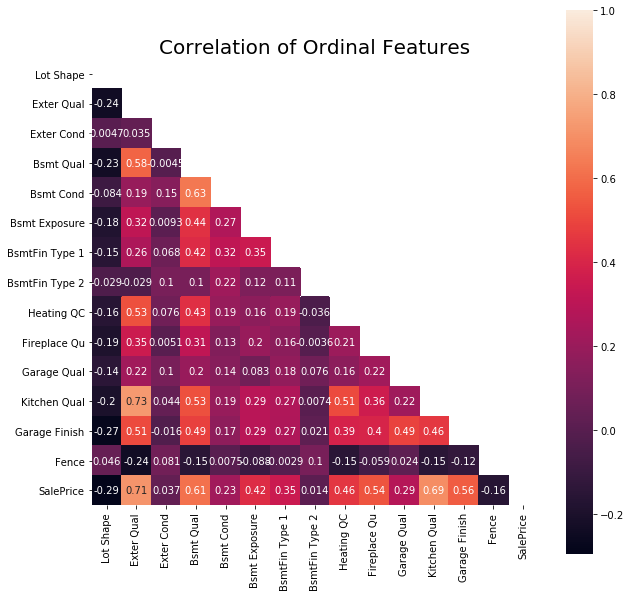

In [93]:
# Correlation of ordinal features 

plt.figure(figsize=(10,10))

ax = plt.axes()
ax.set_title('Correlation of Ordinal Features', fontdict={'fontsize':20})

mask = np.triu(train[ordinal].corr())
sns.heatmap(train[ordinal].corr(),mask=mask,annot=True, square=True);

None of the ordinal features are highly correlated to each other where the threshold is +/-0.8

In [94]:
# Checking the correlation of ordinal features with the target

train[ordinal].corr()['SalePrice'].sort_values()

Lot Shape        -0.294214
Fence            -0.158865
BsmtFin Type 2    0.014232
Exter Cond        0.036555
Bsmt Cond         0.225074
Garage Qual       0.285224
BsmtFin Type 1    0.350064
Bsmt Exposure     0.424949
Heating QC        0.458181
Fireplace Qu      0.538810
Garage Finish     0.558102
Bsmt Qual         0.612507
Kitchen Qual      0.693005
Exter Qual        0.713234
SalePrice         1.000000
Name: SalePrice, dtype: float64

Based on the correlation between each feature with the target `SalePrice`, features that have correlation <+/-0.2:
                     
                     Fence, BsmtFin Type 2, Exter Cond

In [95]:
train.drop(columns= ['Fence', 'BsmtFin Type 2', 'Exter Cond'], inplace = True)
train.shape

(2049, 44)

### One-hot Encode

Encode categorical features by `get_dummies`

In [96]:
# double check is the list of columns for get dummies is correct
train_getdummies = []

for i in train:
    if train[i].dtypes == 'object':
        train_getdummies.append(i)
        
train_getdummies

['MS SubClass',
 'MS Zoning',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type',
 'Mo Sold',
 'Sale Type']

In [97]:
# get dummies for all categories features
for i in train:
    if i in train_getdummies:
        train = pd.concat([train.drop(i, axis=1), pd.get_dummies(train[i],prefix=i)], axis=1)
    else:
        pass

In [98]:
train.shape

(2049, 184)

In [99]:
train.head()

,Lot Area,Lot Shape,Overall Qual,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,Total Bsmt SF,Heating QC,2nd Flr SF,Gr Liv Area,Bsmt Full Bath,Full Bath,Half Bath,Kitchen Qual,Fireplaces,Fireplace Qu,Garage Finish,Garage Area,Garage Qual,Wood Deck SF,Open Porch SF,SalePrice,age,Garage age,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,Roof Style_Hip,Roof Style_Mansard,Roof Style_Shed,Exterior 1st_AsbShng,Exterior 1st_AsphShn,Exterior 1st_BrkComm,Exterior 1st_BrkFace,Exterior 1st_CBlock,Exterior 1st_CemntBd,Exterior 1st_HdBoard,Exterior 1st_ImStucc,Exterior 1st_MetalSd,Exterior 1st_Plywood,Exterior 1st_Stone,Exterior 1st_Stucco,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 1st_WdShing,Exterior 2nd_AsbShng,Exterior 2nd_AsphShn,Exterior 2nd_Brk Cmn,Exterior 2nd_BrkFace,Exterior 2nd_CBlock,Exterior 2nd_CmentBd,Exterior 2nd_HdBoard,Exterior 2nd_ImStucc,Exterior 2nd_MetalSd,Exterior 2nd_Plywood,Exterior 2nd_Stone,Exterior 2nd_Stucco,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Exterior 2nd_Wd Shng,Mas Vnr Type_BrkCmn,Mas Vnr Type_BrkFace,Mas Vnr Type_None,Mas Vnr Type_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Mo Sold_1,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,13517,3,6,289.0,4,3,3,1,6,533.0,725.0,5,754,1479,0.0,2,1,4,0,0,2,475.0,3,0,44,130500,34,34.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,11492,3,7,132.0,4,4,3,1,6,637.0,913.0,5,1209,2122,1.0,2,1,4,1,3,2,559.0,3,0,74,220000,13,12.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,7922,4,5,0.0,3,3,3,1,6,731.0,1057.0,3,0,1057,1.0,1,0,4,0,0,1,246.0,3,0,52,109000,57,57.0,1,0

### Final EDA with All Features

In [100]:
# Checking the correlation between features and SalePrice
train.corr()['SalePrice'].sort_values()

age                    -0.571812
Garage age             -0.555926
Mas Vnr Type_None      -0.411916
Garage Type_Detchd     -0.370191
Foundation_CBlock      -0.355300
Lot Shape              -0.294214
MS Zoning_RM           -0.281825
Roof Style_Gable       -0.248804
MS SubClass_30         -0.248488
Garage Type_None       -0.230932
Foundation_BrkTil      -0.229782
Sale Type_WD           -0.211890
Neighborhood_OldTown   -0.208280
House Style_1.5Fin     -0.195683
Exterior 1st_Wd Sdng   -0.191590
Neighborhood_NAmes     -0.189228
Neighborhood_IDOTRR    -0.189193
MS SubClass_50         -0.182221
Neighborhood_Edwards   -0.176658
Exterior 2nd_Wd Sdng   -0.172825
Exterior 1st_MetalSd   -0.149670
Exterior 2nd_MetalSd   -0.139157
Neighborhood_BrkSide   -0.134724
Neighborhood_Sawyer    -0.133604
Exterior 1st_AsbShng   -0.126308
MS Zoning_C (all)      -0.126237
Condition 1_Artery     -0.124966
Foundation_Slab        -0.119016
MS SubClass_160        -0.114864
Condition 1_Feedr      -0.114257
Exterior 1

In [101]:
corr = pd.DataFrame({'corr':abs(train.corr()['SalePrice']),'features':train.columns})
features = corr[corr['corr']>=0.2]
print(features.shape)

(54, 2)


Final feature selection based on the correlation between feature and SalePrice. Among 183 features, there are 53 have at least +/-0.2 correlation with SalePrice. 

Final train dataset will only include these 53 features to be use as predictors in the model.

In [102]:
train_final = train[features['features']]
train_final.shape

(2049, 54)

## Data Cleaning on Test Dataset
------

### Data Cleaning & Feature Engineering

Perform similar data cleaning and feature engineering for test dataset in order to have same columns in test dataset and can be use for model prediction.

In [103]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [104]:
test.shape

(879, 80)

In [105]:
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [106]:
test.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1         int64
BsmtFin Type 2      object
B

In [107]:
# Change dtypes for categorical data
categorical = ['MS SubClass','Mo Sold']   
for i in categorical:
    test[i] = test[i].astype(object) 

### Feature Engineering

Same manipulation apply on the features

In [108]:
test['remodel'] = abs(test['Year Remod/Add'] - test['Year Built'])

In [109]:
test['remodel'] = [1 if i != 0  else 0 for i in test['remodel']]
test['remodel'].value_counts()

0    468
1    411
Name: remodel, dtype: int64

In [110]:
# Convert the Year to be the age of the property
test['age'] = test['Yr Sold'] - test['Year Built']
test['age'].head()

0    96
1    29
2     0
3    84
4    46
Name: age, dtype: int64

In [111]:
# Change Garage Yr Blt to Garage Age
test['Garage age'] = test['Yr Sold'] - test['Garage Yr Blt']
test['Garage age'].head()

0    96.0
1    29.0
2     0.0
3    72.0
4    46.0
Name: Garage age, dtype: float64

### Data Cleaning

In [112]:
# Drop similar columns before feature engineering
test.drop(columns=['PID','Pool QC','Year Remod/Add','Yr Sold', 'Year Built','Garage Yr Blt','3Ssn Porch', 
                   'Bsmt Half Bath', 'Kitchen AbvGr', 'Low Qual Fin SF','Misc Val','Pool Area','Screen Porch',
                   '1st Flr SF', 'TotRms AbvGrd', 'Garage Cars','Enclosed Porch', 'Overall Cond', 'remodel', 
                   'BsmtFin SF 2', 'Bedroom AbvGr', 'Lot Frontage','Bsmt Unf SF', 'Street', 'Alley', 'Utilities',
                   'Land Slope','Condition 2','Roof Matl','Heating', 'Central Air', 'Electrical', 'Functional',
                   'Garage Cond','Paved Drive','Misc Feature','Fence', 'BsmtFin Type 2', 'Exter Cond'],inplace=True)
test.shape

(879, 44)

In [113]:
# Check for null 
test.isnull().sum().sort_values().tail(15)

Roof Style          0
Exterior 1st        0
Exterior 2nd        0
Condition 1         0
Mas Vnr Area        1
Mas Vnr Type        1
Bsmt Exposure      25
BsmtFin Type 1     25
Bsmt Cond          25
Bsmt Qual          25
Garage Type        44
Garage Qual        45
Garage Finish      45
Garage age         45
Fireplace Qu      422
dtype: int64

In [114]:
# Instead of dropping, fillna with correct info and assume all NaN is none/0
null_num = ['Mas Vnr Area','Garage age']
[test[i].fillna(0,inplace=True) for i in null_num];

null = ['Mas Vnr Type','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','Garage Type','Garage Qual',
       'Garage Finish','Fireplace Qu']
[test[i].fillna('None',inplace=True) for i in null];

In [115]:
test.isnull().sum().max()

0

In [116]:
test.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1',
       'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Total Bsmt SF', 'Heating QC',
       '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Kitchen Qual', 'Fireplaces', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Area', 'Garage Qual', 'Wood Deck SF',
       'Open Porch SF', 'Mo Sold', 'Sale Type', 'age', 'Garage age'],
      dtype='object')

### Feature Engineering on Ordinal Data

Mapping the ordinal features with the same rating scale.

In [117]:
test['Lot Shape'].value_counts()

Reg    564
IR1    287
IR2     21
IR3      7
Name: Lot Shape, dtype: int64

In [118]:
test['Lot Shape'] = test['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
test['Lot Shape'].value_counts()

4    564
3    287
2     21
1      7
Name: Lot Shape, dtype: int64

In [119]:
test['Exter Qual'].value_counts()

TA    552
Gd    292
Ex     26
Fa      9
Name: Exter Qual, dtype: int64

In [120]:
test['Exter Qual'] = test['Exter Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['Exter Qual'].value_counts()

3    552
4    292
5     26
2      9
Name: Exter Qual, dtype: int64

In [121]:
test['Bsmt Qual'].value_counts()

TA      396
Gd      355
Ex       74
Fa       28
None     25
Po        1
Name: Bsmt Qual, dtype: int64

In [122]:
test['Bsmt Qual'] = test['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['Bsmt Qual'].value_counts()

3    396
4    355
5     74
2     28
0     25
1      1
Name: Bsmt Qual, dtype: int64

In [123]:
test['Bsmt Cond'].value_counts()

TA      782
Fa       39
Gd       33
None     25
Name: Bsmt Cond, dtype: int64

In [124]:
test['Bsmt Cond'] = test['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['Bsmt Cond'].value_counts()

3    782
2     39
4     33
0     25
Name: Bsmt Cond, dtype: int64

In [125]:
test['Bsmt Exposure'].value_counts()

No      567
Av      130
Gd       81
Mn       76
None     25
Name: Bsmt Exposure, dtype: int64

In [126]:
test['Bsmt Exposure'] = test['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
test['Bsmt Exposure'].value_counts()

1    567
3    130
4     81
2     76
0     25
Name: Bsmt Exposure, dtype: int64

In [127]:
test['BsmtFin Type 1'].value_counts()

Unf     248
GLQ     244
ALQ     136
Rec     105
BLQ      69
LwQ      52
None     25
Name: BsmtFin Type 1, dtype: int64

In [128]:
test['BsmtFin Type 1'] = test['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
test['BsmtFin Type 1'].value_counts()

1    248
6    244
5    136
3    105
4     69
2     52
0     25
Name: BsmtFin Type 1, dtype: int64

In [129]:
test['Heating QC'].value_counts()

Ex    430
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64

In [130]:
test['Heating QC'] = test['Heating QC'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['Heating QC'].value_counts()

5    430
3    267
4    157
2     25
Name: Heating QC, dtype: int64

In [131]:
test['Fireplace Qu'].value_counts()

None    422
Gd      221
TA      193
Fa       16
Po       15
Ex       12
Name: Fireplace Qu, dtype: int64

In [132]:
test['Fireplace Qu'] = test['Fireplace Qu'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['Fireplace Qu'].value_counts()

0    422
4    221
3    193
2     16
1     15
5     12
Name: Fireplace Qu, dtype: int64

In [133]:
test['Garage Qual'].value_counts()

TA      783
None     45
Fa       42
Gd        6
Po        3
Name: Garage Qual, dtype: int64

In [134]:
test['Garage Qual'] = test['Garage Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'None':0})
test['Garage Qual'].value_counts()

3    783
0     45
2     42
4      6
1      3
Name: Garage Qual, dtype: int64

In [135]:
test['Kitchen Qual'].value_counts()

TA    447
Gd    354
Ex     54
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64

In [136]:
test['Kitchen Qual'] = test['Kitchen Qual'].map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
test['Kitchen Qual'].value_counts()

3    447
4    354
5     54
2     23
1      1
Name: Kitchen Qual, dtype: int64

In [137]:
test['Garage Finish'].value_counts()

Unf     382
RFn     233
Fin     219
None     45
Name: Garage Finish, dtype: int64

In [138]:
test['Garage Finish'] = test['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1,'None':0})
test['Garage Finish'].value_counts()

1    382
2    233
3    219
0     45
Name: Garage Finish, dtype: int64

In [139]:
# double check is the list of columns for get dummies is correct
test_getdummies = []
for i in test:
    if test[i].dtypes == 'object':
        test_getdummies.append(i)        
test_getdummies

['MS SubClass',
 'MS Zoning',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Garage Type',
 'Mo Sold',
 'Sale Type']

In [140]:
# get dummies for all categories data
for i in test:
    if i in test_getdummies:
        test = pd.concat([test.drop(i, axis=1), pd.get_dummies(test[i],prefix=i)], axis=1)
    else:
        pass

In [141]:
# test should be 54 with Id as compared to train have 54 with saleprice
test.shape

(879, 181)

#### Note that there is extra features being drop after one-hot encode in train dataset , drop the extra features in test data which are not in train data.

In [142]:
test_extra = []
for i in test.columns:
    if i not in train_final.columns and i!='Id':
        test_extra.append(i)
test_extra

['MS SubClass_20',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS SubClass_120',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'Land Contour_Bnk',
 'Land Contour_Low',
 'Land Contour_Lvl',
 'Lot Config_Corner',
 'Lot Config_CulDSac',
 'Lot Config_FR2',
 'Lot Config_FR3',
 'Lot Config_Inside',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_Greens',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborho

In [143]:
# drop columns in order to make both dataset have same feature column
test.drop(columns=test_extra,inplace=True)

print(f'{train_final.shape} & {test.shape}')

(2049, 54) & (879, 54)


In [144]:
# save csv file for both cleaned train/test dataset
train_final.to_csv('./datasets/train_cleaned.csv', index=False)
test.to_csv('./datasets/test_cleaned.csv', index=False)